In [1]:
import os
from google.colab import drive

drive.mount('/content/gdrive')
%cd '/content/gdrive/My Drive/Machine Learning'

Mounted at /content/gdrive
/content/gdrive/My Drive/Machine Learning


In [2]:
!ls

test  train


In [3]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'train'
valid_path = 'test'

In [5]:
##setting the weights as of the imagenet and not including the fully connected layers
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [6]:
##no need to train the convolution layers
for layer in inception.layers:
    layer.trainable = False

In [7]:
# useful for getting number of output classes
folders = glob('train/*')

In [11]:
folders1 = glob('test/*')

In [9]:

folders

['train/bat', 'train/boar', 'train/locust', 'train/mole', 'train/rabbit']

In [12]:
folders1

['test/bat', 'test/boar', 'test/locust', 'test/mole', 'test/rabbit']

In [13]:
x = Flatten()(inception.output)

In [14]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inception.input,prediction)

In [15]:
# view the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [16]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:

training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 569 images belonging to 5 classes.


In [20]:
test_set = test_datagen.flow_from_directory('test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 54 images belonging to 5 classes.


In [23]:
# fit the model
final = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/6
18/18 [==============================] - 69s 4s/step - loss: 0.2240 - accuracy: 0.9772 - val_loss: 0.0146 - val_accuracy: 1.0000
Epoch 2/6
18/18 [==============================] - 68s 4s/step - loss: 0.1404 - accuracy: 0.9666 - val_loss: 0.0206 - val_accuracy: 0.9815
Epoch 3/6
18/18 [==============================] - 68s 4s/step - loss: 0.1047 - accuracy: 0.9912 - val_loss: 0.0933 - val_accuracy: 0.9630
Epoch 4/6
18/18 [==============================] - 69s 4s/step - loss: 0.0531 - accuracy: 0.9930 - val_loss: 0.4667 - val_accuracy: 0.9815
Epoch 5/6
18/18 [==============================] - 67s 4s/step - loss: 0.0818 - accuracy: 0.9877 - val_loss: 0.4080 - val_accuracy: 0.9815
Epoch 6/6
18/18 [==============================] - 68s 4s/step - loss: 0.0375 - accuracy: 0.9965 - val_loss: 0.0442 - val_accuracy: 0.9815


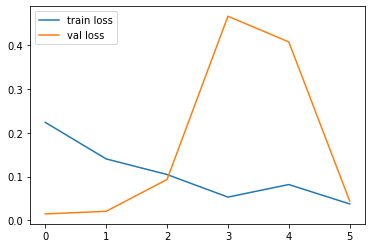

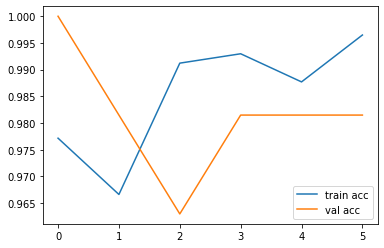

<Figure size 432x288 with 0 Axes>

In [24]:
# plot the loss
plt.plot(final.history['loss'], label='train loss')
plt.plot(final.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(final.history['accuracy'], label='train acc')
plt.plot(final.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [25]:
#Saving the model
model.save('modelpest_inception.h5')

In [26]:

y_pred = model.predict(test_set)

In [27]:
##Taking the index of the max value
y_pred = np.argmax(y_pred, axis=1)

In [28]:
y_pred

array([4, 2, 1, 0, 3, 2, 3, 4, 1, 3, 1, 0, 2, 2, 3, 0, 1, 2, 4, 4, 4, 0,
       0, 2, 2, 1, 0, 3, 3, 3, 1, 1, 3, 4, 2, 4, 2, 4, 4, 4, 4, 0, 3, 3,
       2, 2, 4, 3, 0, 3, 3, 4, 2, 0])

bat


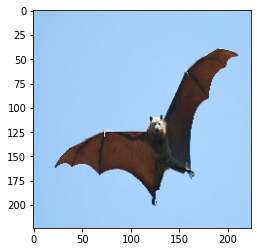

In [30]:
img = image.load_img("test/bat/ia_100000000478.jpg",target_size=(224,224)) ##loading the image
img = np.asarray(img) ##converting to an array
img = img / 255 ##scaling by doing a division of 255
plt.imshow(img)
img = np.expand_dims(img, axis=0) ##expanding the dimensions
from keras.models import load_model
saved_model = load_model("modelpest_inception.h5") ##loading the model
output = saved_model.predict(img)
output = np.argmax(output, axis=1) ##Taking the index of the maximum value
if output[0] == 0 :
  print('bat')
elif output[0] == 1:
  print('boar')
elif output[0] == 2 :
  print('locust')
elif output[0] == 3:
  print('mole')
else:
  print('rabbit')